Implement and train a transfer learning model, selecting a model from Keras Built-in Vision Models

Make sure you look make the learning curves.

Save the model using model.save() (see Keras Model Saving)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

In [12]:
from dataloader import load_data, visualize_images

# Select classes and discard extra classes
classes = ['pizza','not_pizza']

# Create directories for train and test data
train_dir = "train_data"
test_dir = "test_data"
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Copy a subset of images for each class to train and test directories
for class_name in classes:
    class_dir = os.path.join("pizza_not_pizza", class_name)
    all_images = os.listdir(class_dir)
    selected_images = np.random.choice(all_images, size=min(100, len(all_images)), replace=False)
    train_images, test_images = train_test_split(selected_images, test_size=0.2, random_state=42)
    
    for image in train_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(train_dir, class_name, image)
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)
    
    for image in test_images:
        src = os.path.join(class_dir, image)
        dst = os.path.join(test_dir, class_name, image)
        os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
        shutil.copy(src, dst)

#Load data
train_generator, test_generator = load_data(train_dir, test_dir)

Found 195 images belonging to 2 classes.
Found 74 images belonging to 2 classes.


In [13]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)


/home/sarahesayas/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/home/sarahesayas/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - accuracy: 0.4760 - loss: 1.0562 - val_accuracy: 0.4865 - val_loss: 0.6917
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 210s 22s/step - accuracy: 0.5315 - loss: 0.6901 - val_accuracy: 0.5946 - val_loss: 0.6787
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - accuracy: 0.5928 - loss: 0.6834 - val_accuracy: 0.4865 - val_loss: 0.6846
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 267ms/step - accuracy: 0.5522 - loss: 0.6805 - val_accuracy: 0.6757 - val_loss: 0.6339
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.6393 - loss: 0.6168 - val_accuracy: 0.6081 - val_loss: 0.6292
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.6959 - loss: 0.6139 - val_accuracy: 0.6757 - val_loss: 0.5893
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 252ms/step - accuracy: 0.7984 - loss: 0.5001 - val_accuracy: 0.7432 - val_loss: 0.5070
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.7374 - loss: 0.4682 - val_accuracy: 0.8378 - val_

## Learning Curves

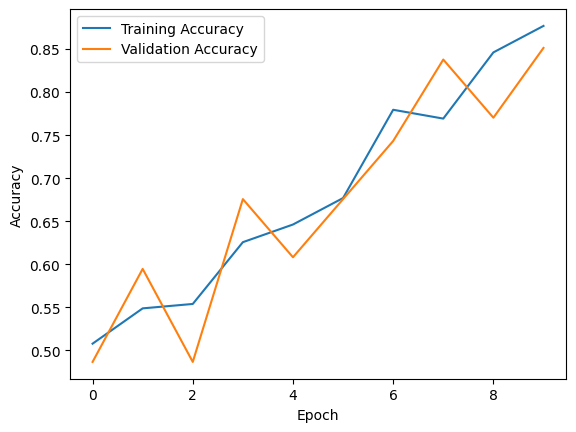

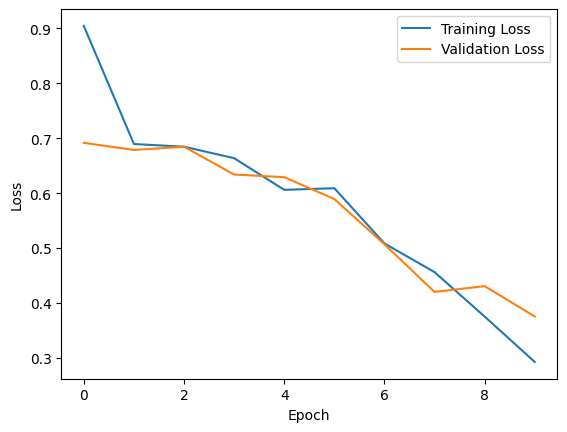

In [14]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model.save("baseline_model.h5")  # Save the baseline model